### Phép biến đổi

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Điều chỉnh tương phản bằng log

In [1]:
def logarit(img):
    c = 255 / np.log(1 + np.max(img))
    return c * (np.log(img + 1))

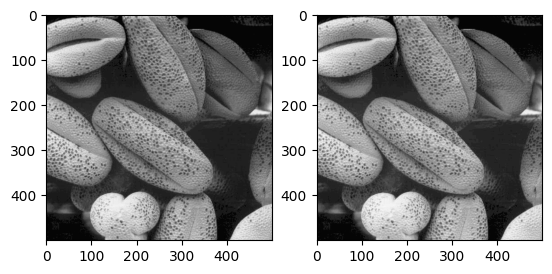

In [10]:
# test
img = plt.imread('img2.jpg')
img_log = logarit(img)

# biểu diễn 2 ảnh trên 2 đồ thị
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_log, cmap='gray')
plt.show()

#### Tách ngưỡng âm bản

In [12]:
# tách ngưỡng âm bản
def thresshold_negative(x, thresshold):
    x[x < thresshold] = 0
    return x

In [21]:
def negative(frame):
    frame = 255 - frame
    return frame

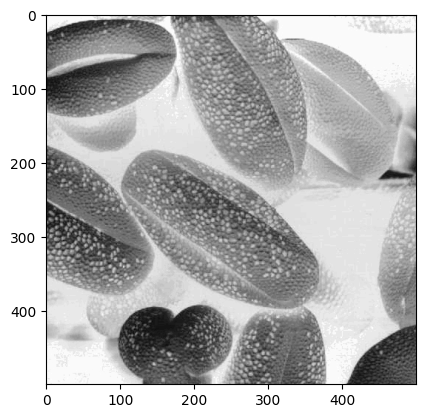

In [25]:
img = plt.imread('img2.jpg', 0)
img = negative(img)
img_log = logarit(img)
neg_img = thresshold_negative(img_log, 50)
plt.imshow(neg_img, cmap='gray')

$$\begin{equation}I'(x,y) = \begin{cases}
\alpha.I(x,y) & \text{nếu I(x,y)} < k1 \\
\beta.I(x,y) + \alpha.k1 & k1 <= \text{nếu I(x,y)} <= k2 \\
\alpha.I(x,y) + \alpha.k1 + \beta.(k2-k1) & \text{nếu I(x,y)} > k2 \\
\end{cases}
\end{equation}$$

In [31]:
import math
def alpha(x, alpha, k1, k2):
    if x < k1:
        f = math.tan(alpha) * x
        return f
    elif x <= k2 and x >= k1:
        tan_beta = (255 - k1* math.tan(alpha) * 2)/(k2-k1)
        f = tan_beta * (x - k1) + math.tan(alpha) * k1
        return f
    else:
        f = math.tan(alpha) * x + math.tan(alpha) * k1 + tan_beta * (k1 - k2)
        return f


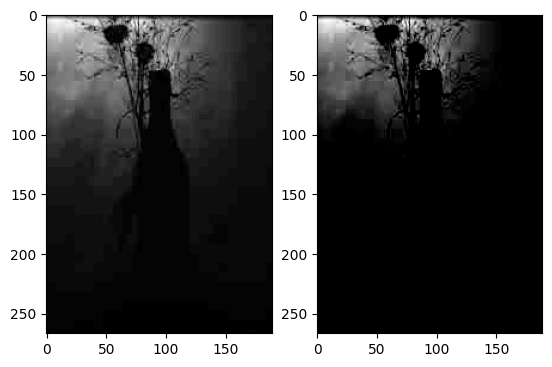

In [55]:
# test
img = cv2.imread('img5.jpeg', 0)
plt.subplot(121)
plt.imshow(img, cmap='gray')
for i in range(len(img[:])):
    for j in range(len(img[i][:])):
        img[i][j] = alpha(img[i][j], 0.01, 10, 200) 
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.show()